In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [142]:
# df = pd.read_csv('C:/Users/harshathunga/python practice/analysis/excel practice/sales - Copy.csv', parse_dates =["Date"], index_col = "State")
dt = pd.read_csv('C:/Users/harshathunga/python practice/analysis/excel practice/sales - Copy.csv', parse_dates =["Date"], index_col = "Date")
dt.head(5)

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Product Type,Product,Type
Date,,,,,,,,,,,,,,,,,,,
2010-04-01,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,Coffee,Columbian,Regular
2010-07-01,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,Coffee,Columbian,Regular
2010-11-01,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,Coffee,Columbian,Regular
2010-12-01,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,Coffee,Columbian,Regular
2011-07-01,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,Coffee,Columbian,Regular


In [107]:
ndt = dt.rename(columns = {'Market Size': 'MS','Product Type':'PT'}, inplace =  True)

which is making more profit (state and market)
which product is selling more 
who is spending more on the marketing state(state and market)
sales of every month
profits of every month
which one had more cogs (state and market)
cogs per date
total expenses(state and market)

### analysis

In [65]:
y = dt.loc["2010-01-01" : "2010-10-31"]
oy = pd.DataFrame(y)

In [78]:
oy.head(2)

,Area Code,State,Market,MS,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,PT,Product,Type
Date,,,,,,,,,,,,,,,,,,,
2010-04-01,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,Coffee,Columbian,Regular
2010-07-01,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,Coffee,Columbian,Regular


# to check the profits of the perticular date

In [67]:
oy.index

DatetimeIndex(['2010-04-01', '2010-07-01', '2010-06-01', '2010-06-01',
               '2010-10-01', '2010-02-01', '2010-05-01', '2010-07-01',
               '2010-08-01', '2010-03-01',
               ...
               '2010-10-01', '2010-02-01', '2010-09-01', '2010-04-01',
               '2010-05-01', '2010-08-01', '2010-04-01', '2010-05-01',
               '2010-07-01', '2010-08-01'],
              dtype='datetime64[ns]', name='Date', length=1770, freq=None)

# sales of every month

<AxesSubplot:xlabel='Date', ylabel='Sales'>

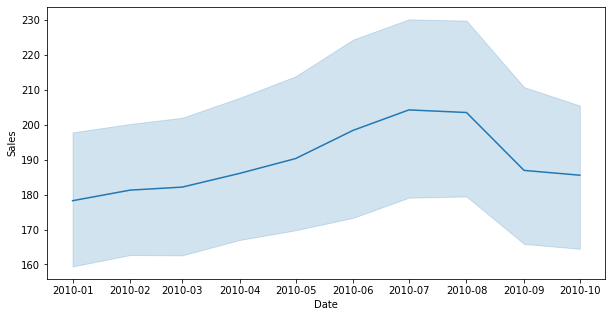

In [68]:
plt.figure(figsize=(10,5))
sns.lineplot(x= oy.index, y= "Sales", data=oy)

sales of every day

## which state is spending more in marketing



In [69]:
detaild = oy.groupby("State").sum()
detaild.head(5)
# detaild.sort_values(by="Marketing", ascending=False).head(10)

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
State,,,,,,,,,,,,,
California,76659,11063.0,20921.0,40102.0,19181.0,9858.0,6767.0,145526.0,12220.0,18440.0,19830.0,38270.0,840
Colorado,74832,6074.0,11193.0,19731.0,8538.0,5119.0,2848.0,74730.0,7510.0,7730.0,11270.0,19000.0,800
Connecticut,43660,2521.0,5911.0,10228.0,4317.0,3390.0,1730.0,51629.0,3310.0,3510.0,5510.0,9020.0,560
Florida,58786,4277.0,8943.0,15487.0,6544.0,4666.0,2647.0,60609.0,5110.0,5500.0,8350.0,13850.0,670
Illinois,49943,10623.0,16415.0,28846.0,12431.0,5792.0,3775.0,83047.0,12380.0,12460.0,17210.0,29670.0,660


[Text(0.5, 1.0, 'marketing spending per state')]

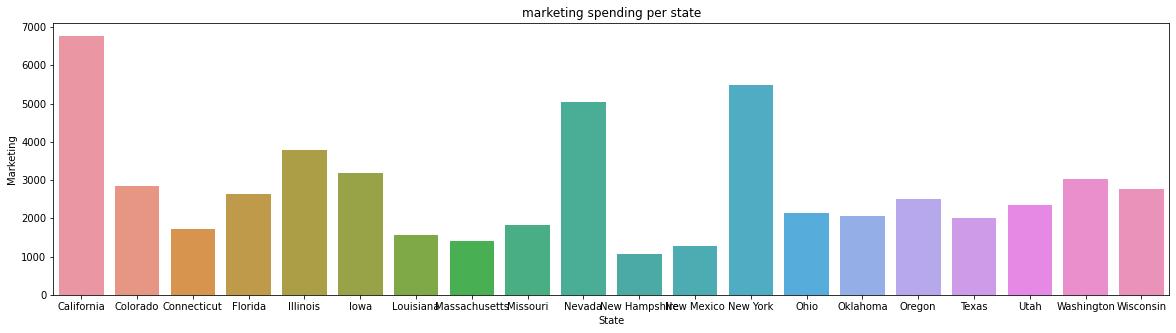

In [70]:
plt.figure(figsize=(20,5))
sns.barplot(x= detaild.index, y = "Marketing" , data = detaild ).set(title = "marketing spending per state")

## profits per date

In [71]:
datewise = dt.groupby(dt.index).sum()
datewise.head(2)

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
Date,,,,,,,,,,,,,
2010-01-01,100347,8041.0,17378.0,31555.0,14160.0,9354.0,5223.0,117405.0,9940.0,12630.0,16850.0,29480.0,1219
2010-02-01,107270,8369.0,17762.0,32092.0,14307.0,9416.0,5289.0,116434.0,10350.0,12670.0,17330.0,30000.0,1219


[Text(0.5, 1.0, 'profits montly')]

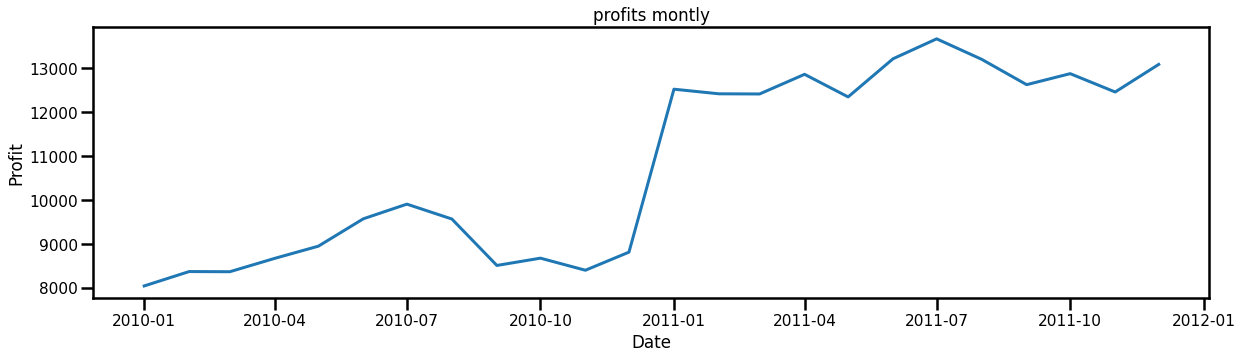

In [121]:
plt.figure(figsize=(20,5))
sns.set_context('poster', font_scale = 0.7)
sns.lineplot(x = datewise.index, y = "Profit", data = datewise).set(title = "profits montly")

# most selling product type and product

[Text(0.5, 1.0, 'best selling product')]

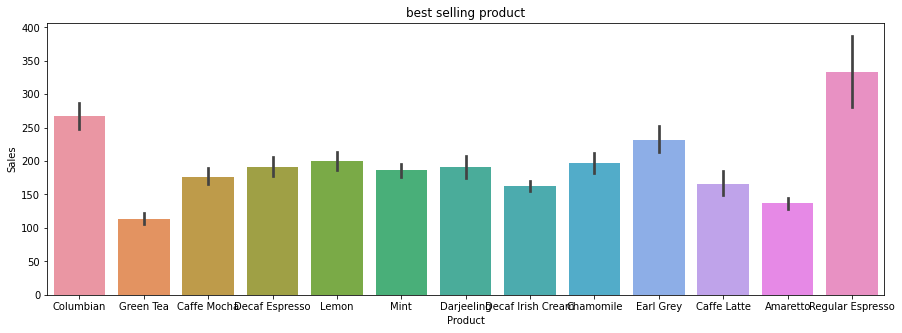

In [73]:
plt.figure(figsize=(15,5))
sns.barplot(x= dt.Product, y = dt.Sales).set(title = "best selling product")

# best selling Product

[Text(0.5, 1.0, 'best selling product type ')]

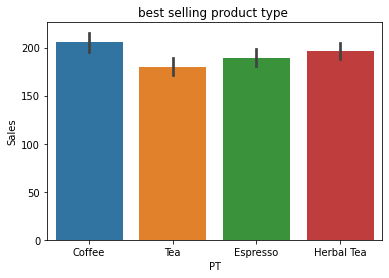

In [74]:
sns.barplot(x= "PT", y=  "Sales", data = dt).set(title =  "best selling product type ")

[Text(0.5, 1.0, 'Best selling product')]

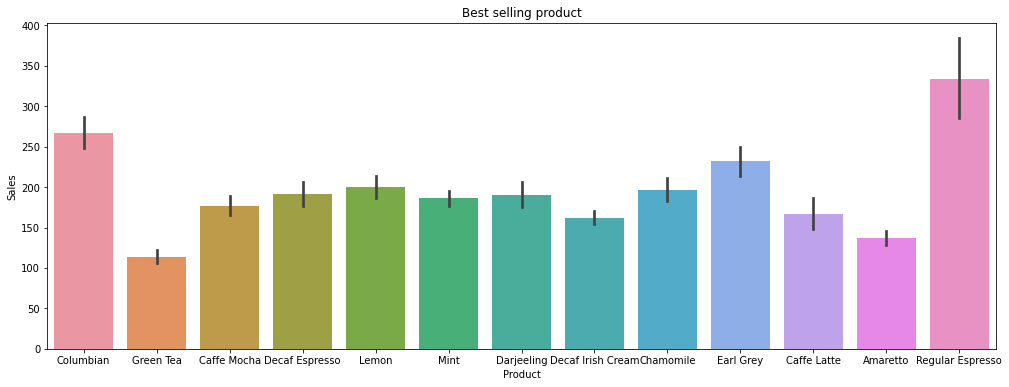

In [84]:
plt.figure(figsize=(17,6))
sns.barplot(x="Product",y="Sales", data = dt).set(title="Best selling product")

In [75]:
dt.head(2)

,Area Code,State,Market,MS,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,PT,Product,Type
Date,,,,,,,,,,,,,,,,,,,
2010-04-01,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,Coffee,Columbian,Regular
2010-07-01,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,Coffee,Columbian,Regular


# which market is making the more profits

[Text(0.5, 1.0, 'market profits per market')]

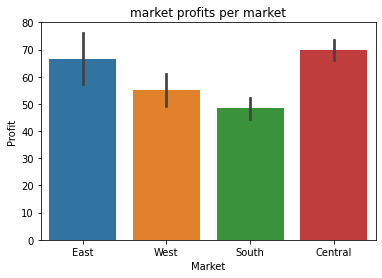

In [94]:
sns.barplot(x ="Market", y ="Profit", data=dt).set(title="market profits per market")

[Text(0.5, 1.0, 'market profits per state')]

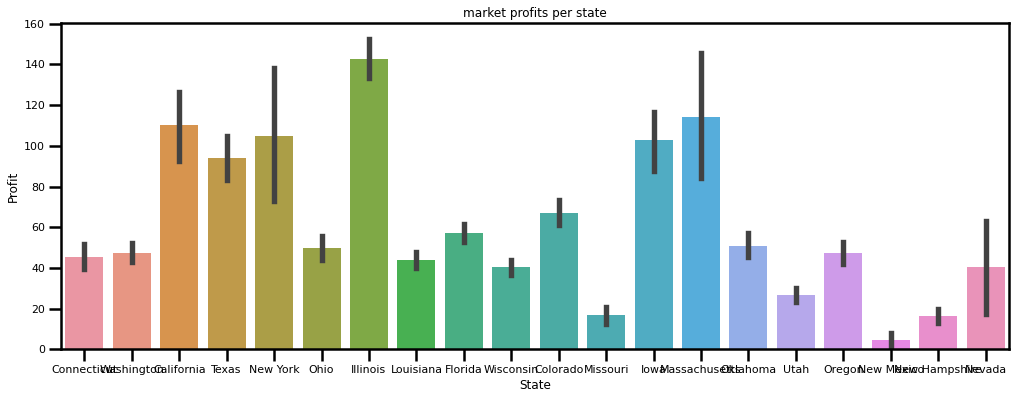

In [127]:
plt.figure(figsize=(17,6))
sns.set_context('poster', font_scale = 0.5)
sns.barplot(x ="State", y ="Profit", data=dt).set(title="market profits per state")

# which is making the more cogs both state and market

[Text(0.5, 1.0, 'cogs for the market')]

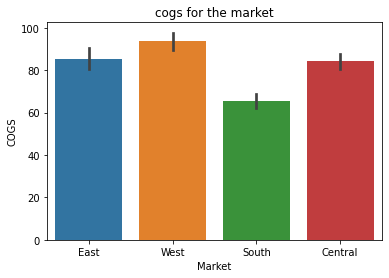

In [96]:
sns.barplot(x="Market", y="COGS", data=dt).set(title="cogs for the market")

[Text(0.5, 1.0, 'cogs for the market')]

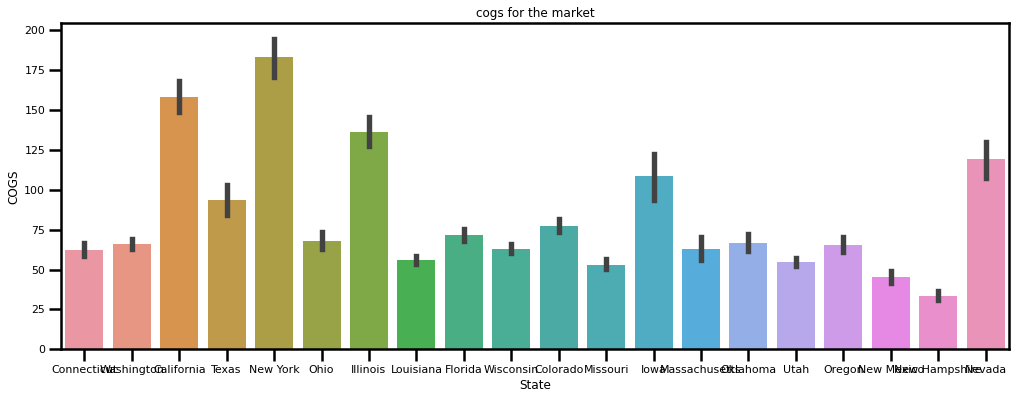

In [131]:
plt.figure(figsize=(17,6))
sns.set_context('poster',font_scale = 0.5)
sns.barplot(x="State", y="COGS", data=dt).set(title="cogs for the market")

[Text(0.5, 1.0, 'cogs for the market')]

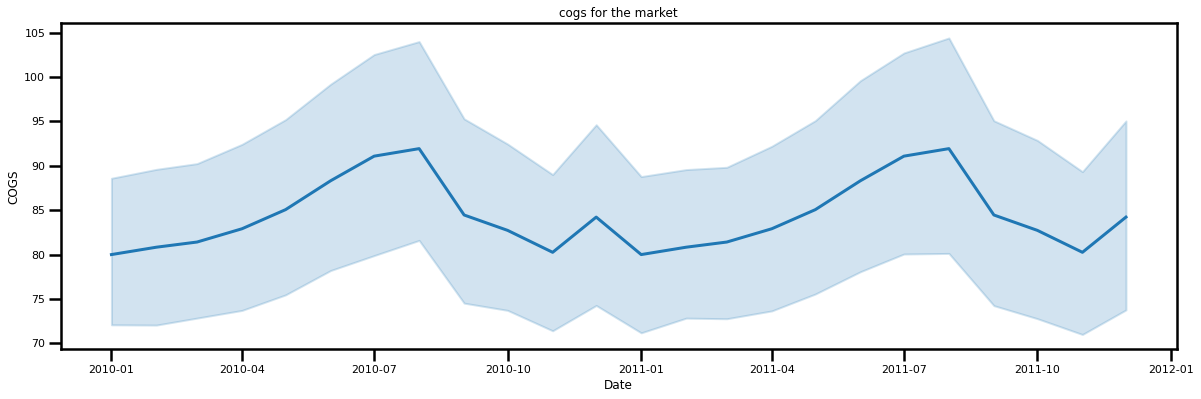

In [132]:
plt.figure(figsize=(20,6))
sns.set_context('poster',font_scale = 0.5)
sns.lineplot(x=dt.index, y="COGS", data=dt).set(title="cogs for the market")

# expenses  both state and market

[Text(0.5, 1.0, 'expenses of the state')]

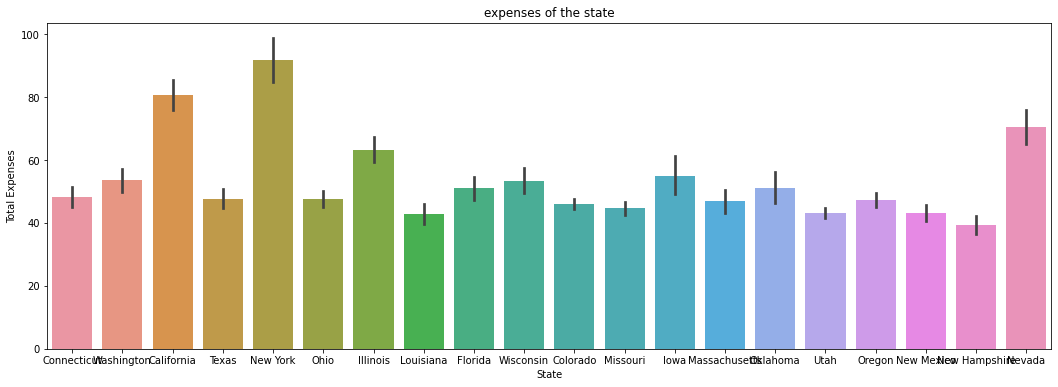

In [103]:
dt.head(2)
plt.figure(figsize=(18,6))
sns.barplot(x="State",y="Total Expenses",data =dt).set(title="expenses of the state")

[Text(0.5, 1.0, 'expenses of the Market')]

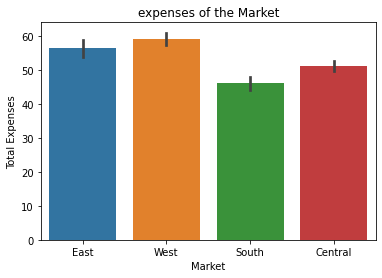

In [105]:
dt.head(2)
# plt.figure(figsize=(18,6))
sns.barplot(x="Market",y="Total Expenses",data =dt).set(title="expenses of the Market")

# date wise inventory

[]

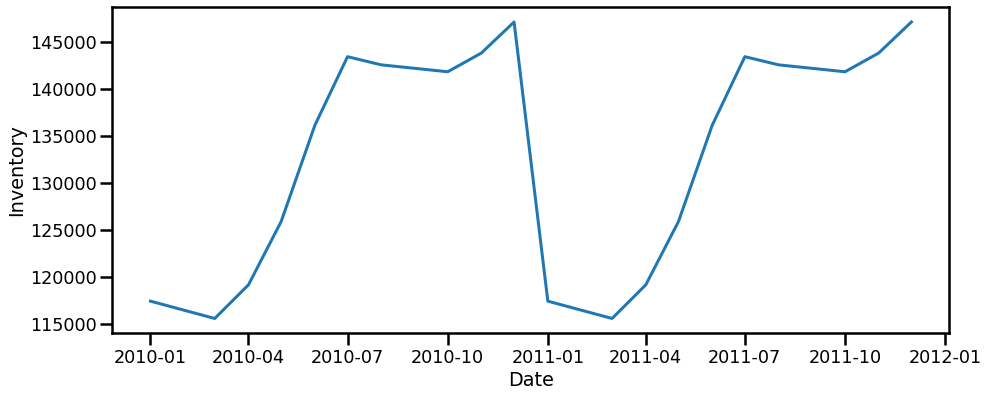

In [120]:
plt.figure(figsize=(15,6))
sns.set_context('poster',font_scale = 0.8)
sns.lineplot(x=datewise.index, y = "Inventory", data = datewise).set()

# who has more inventery state and market

[Text(0.5, 1.0, 'inventory state wise')]

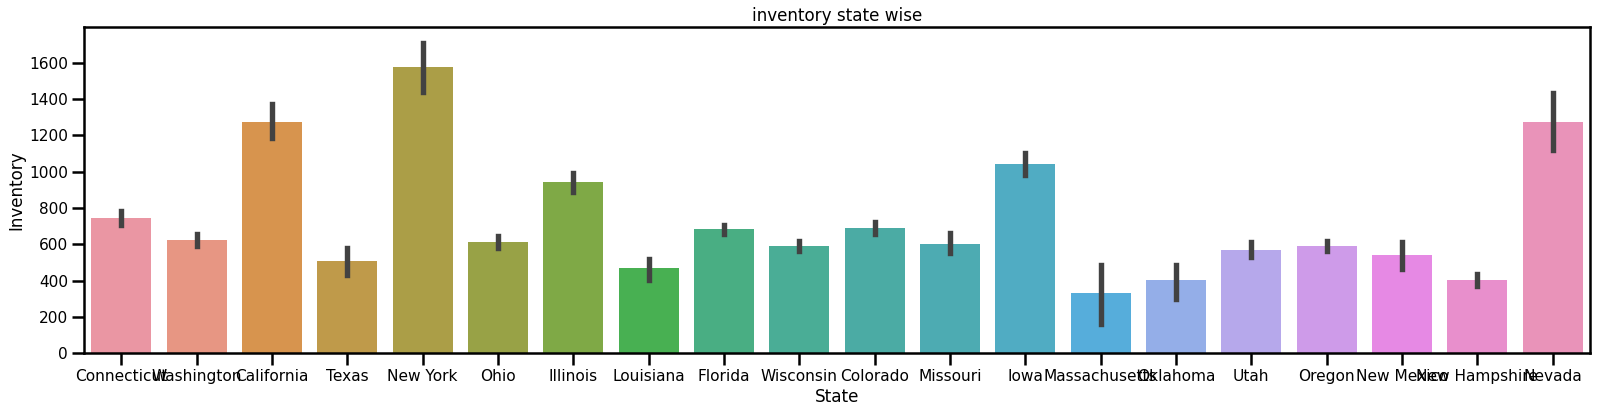

In [140]:
plt.figure(figsize=(27,6))
sns.set_context("poster", font_scale=0.7)
sns.barplot(x = "State", y = "Inventory", data = dt).set(title= "inventory state wise")

[Text(0.5, 1.0, 'inventory Market wise')]

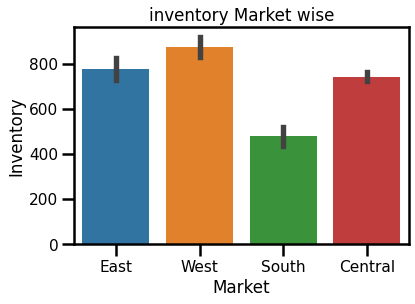

In [141]:
# plt.figure(figsize=(15,6))
sns.set_context("poster", font_scale=0.7)
sns.barplot(x = "Market", y = "Inventory", data = dt).set(title= "inventory Market wise")